**Data Wrangling: II**
Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student.csv')
df.head()

,student_id,age,gender,test_scores,study_hours
0,1,18.0,M,85.0,6
1,2,20.0,F,78.0,5
2,3,19.0,F,92.0,7
3,4,22.0,M,80.0,5
4,5,21.0,M,75.0,4


In [19]:
df.shape

(15, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   15 non-null     int64  
 1   age          14 non-null     float64
 2   gender       15 non-null     object 
 3   test_scores  14 non-null     float64
 4   study_hours  15 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 732.0+ bytes


In [10]:
df.describe()

,student_id,age,test_scores,study_hours
count,15.000000,14.000000,14.000000,15.000000
mean,8.000000,20.571429,85.357143,5.666667
std,4.472136,1.696797,6.307592,1.046536
min,1.000000,18.000000,75.000000,4.000000
25%,4.500000,19.250000,80.250000,5.000000
50%,8.000000,20.000000,86.000000,6.000000
75%,11.500000,21.750000,89.750000,6.500000
max,15.000000,24.000000,95.000000,7.000000


In [11]:
df.isna().sum()

student_id     0
age            1
gender         0
test_scores    1
study_hours    0
dtype: int64

In [13]:
df['age'].fillna(df['age'].median(), inplace=True)

In [14]:
df['test_scores'].fillna(df['test_scores'].median(), inplace=True)

In [15]:
df.isna().sum()

student_id     0
age            0
gender         0
test_scores    0
study_hours    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [17]:
df['gender'] = labelencoder.fit_transform(df['gender'])

In [18]:
df.head()

,student_id,age,gender,test_scores,study_hours
0,1,18.0,1,85.0,6
1,2,20.0,0,78.0,5
2,3,19.0,0,92.0,7
3,4,22.0,1,80.0,5
4,5,21.0,1,75.0,4


<Axes: xlabel='study_hours', ylabel='test_scores'>

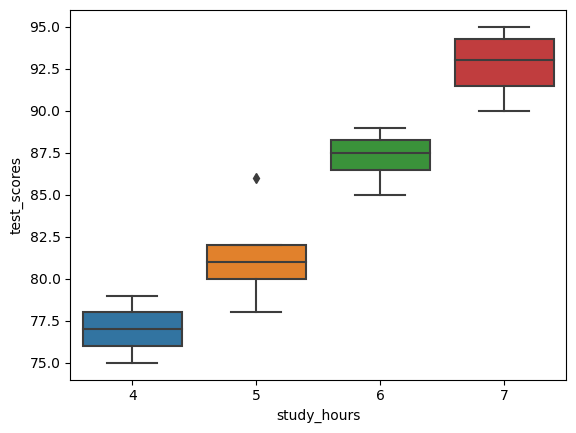

In [21]:
sbn.boxplot(data=df, x='study_hours', y='test_scores')

In [23]:
sorted_test_score = np.sort(df['test_scores'])
sorted_test_score

array([75., 78., 79., 80., 81., 82., 85., 86., 87., 88., 89., 90., 92.,
       94., 95.])

In [24]:
mean = np.mean(sorted_test_score)
std = np.std(sorted_test_score)

In [33]:
outliers = []
for x in sorted_test_score:
    z = (x - mean)/std
    #z = np.abs(z)
    if z>1.5 or z<-1.5:
        outliers.append(x)
print(outliers)

[75.0, 95.0]
